In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d arjuntejaswi/plant-village


 97% 318M/329M [00:02<00:00, 160MB/s]
100% 329M/329M [00:02<00:00, 143MB/s]


In [3]:
!ls

drive  kaggle.json  plant-village.zip  sample_data


In [4]:
from zipfile import ZipFile, BadZipFile

dataset = '/content/plant-village.zip'

try:
    with ZipFile(dataset, 'r') as zip:
        zip.extractall()
        print('The dataset is extracted')
except BadZipFile as e:
    print(f"Error: {e}")


The dataset is extracted


In [5]:
import shutil
import os

def delete_directory(directory_path):
    """
    Delete a directory and its contents.

    Parameters:
    - directory_path (str): The path of the directory to be deleted.
    """
    try:
        # Use shutil.rmtree to delete the directory and its contents, ignoring errors
        shutil.rmtree(directory_path, ignore_errors=True)
        print(f'The directory {directory_path} and its contents have been deleted.')
    except Exception as e:
        print(f'Error: {e}')
# Example usage:
directory_to_delete = '/content/PlantVillage/Pepper__bell___Bacterial_spot'
delete_directory(directory_to_delete)
# Example usage:
directory_to_delete = '/content/PlantVillage/Pepper__bell___healthy'
delete_directory(directory_to_delete)
# Example usage:
directory_to_delete = '/content/PlantVillage/Tomato_Bacterial_spot'
delete_directory(directory_to_delete)
# Example usage:
directory_to_delete = '/content/PlantVillage/Tomato_Early_blight'
delete_directory(directory_to_delete)
# Example usage:
directory_to_delete = '/content/PlantVillage/Tomato_Late_blight'
delete_directory(directory_to_delete)
# Example usage:
directory_to_delete = '/content/PlantVillage/Tomato_Leaf_Mold'
delete_directory(directory_to_delete)
# Example usage:
directory_to_delete = '/content/PlantVillage/Tomato_Septoria_leaf_spot'
delete_directory(directory_to_delete)
# Example usage:
directory_to_delete = '/content/PlantVillage/Tomato_Spider_mites_Two_spotted_spider_mite'
delete_directory(directory_to_delete)
# Example usage:
directory_to_delete = '/content/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus'
delete_directory(directory_to_delete)
# Example usage:
directory_to_delete = '/content/PlantVillage/Tomato_healthy'
delete_directory(directory_to_delete)

directory_to_delete = '/content/PlantVillage/Tomato__Target_Spot'
delete_directory(directory_to_delete)
# Example usage:
directory_to_delete = '/content/PlantVillage/Tomato__Tomato_mosaic_virus'
delete_directory(directory_to_delete)

The directory /content/PlantVillage/Pepper__bell___Bacterial_spot and its contents have been deleted.
The directory /content/PlantVillage/Pepper__bell___healthy and its contents have been deleted.
The directory /content/PlantVillage/Tomato_Bacterial_spot and its contents have been deleted.
The directory /content/PlantVillage/Tomato_Early_blight and its contents have been deleted.
The directory /content/PlantVillage/Tomato_Late_blight and its contents have been deleted.
The directory /content/PlantVillage/Tomato_Leaf_Mold and its contents have been deleted.
The directory /content/PlantVillage/Tomato_Septoria_leaf_spot and its contents have been deleted.
The directory /content/PlantVillage/Tomato_Spider_mites_Two_spotted_spider_mite and its contents have been deleted.
The directory /content/PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus and its contents have been deleted.
The directory /content/PlantVillage/Tomato_healthy and its contents have been deleted.
The directory /content/Pla

In [6]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML

## **Set all the Constants**

In [51]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

## **Import data into tensorflow dataset object**

In [8]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    seed=123,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


In [9]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [10]:
len(dataset)

68

In [11]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 1 2 0 0]


In [12]:
import os

def count_images_in_directory(directory_path):
    """
    Count the number of image files in a directory.

    Parameters:
    - directory_path (str): The path of the directory to count images.

    Returns:
    - int: The number of image files in the directory.
    """
    try:
        # List all files in the directory
        all_files = os.listdir(directory_path)

        # Filter only files with common image extensions (you can customize this list)
        image_extensions = ['.jpg', '.jpeg', '.png', '.gif', '.bmp']
        image_files = [file for file in all_files if any(file.lower().endswith(ext) for ext in image_extensions)]

        # Count the number of image files
        num_images = len(image_files)

        print(f'The directory {directory_path} contains {num_images} image(s).')

        return num_images
    except Exception as e:
        print(f'Error: {e}')
        return 0  # Return 0 if there is an error

# Example usage:
directory_to_count = '/content/PlantVillage/Potato___Late_blight'
count_images = count_images_in_directory(directory_to_count)


The directory /content/PlantVillage/Potato___Late_blight contains 1000 image(s).


In [13]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[163. 161. 172.]
  [129. 127. 138.]
  [108. 106. 117.]
  ...
  [163. 161. 175.]
  [158. 156. 170.]
  [153. 151. 165.]]

 [[149. 147. 158.]
  [ 98.  96. 107.]
  [144. 142. 153.]
  ...
  [159. 157. 171.]
  [165. 163. 177.]
  [168. 166. 180.]]

 [[100.  98. 109.]
  [117. 115. 126.]
  [188. 186. 199.]
  ...
  [163. 161. 175.]
  [164. 162. 176.]
  [164. 162. 176.]]

 ...

 [[142. 138. 153.]
  [120. 116. 131.]
  [136. 132. 147.]
  ...
  [180. 178. 191.]
  [178. 176. 189.]
  [189. 187. 200.]]

 [[118. 114. 129.]
  [102.  98. 113.]
  [157. 153. 168.]
  ...
  [177. 175. 188.]
  [172. 170. 183.]
  [177. 175. 188.]]

 [[123. 119. 134.]
  [128. 124. 139.]
  [148. 144. 159.]
  ...
  [205. 203. 216.]
  [188. 186. 199.]
  [173. 171. 184.]]]


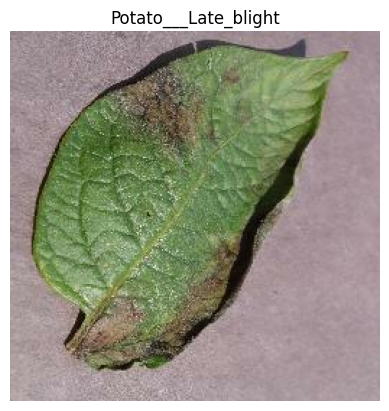

In [14]:
for image_batch, label_batch in dataset.take(1):
  plt.imshow(image_batch[0].numpy().astype("uint8"))
  plt.title(class_names[label_batch[0]])
  plt.axis("off")

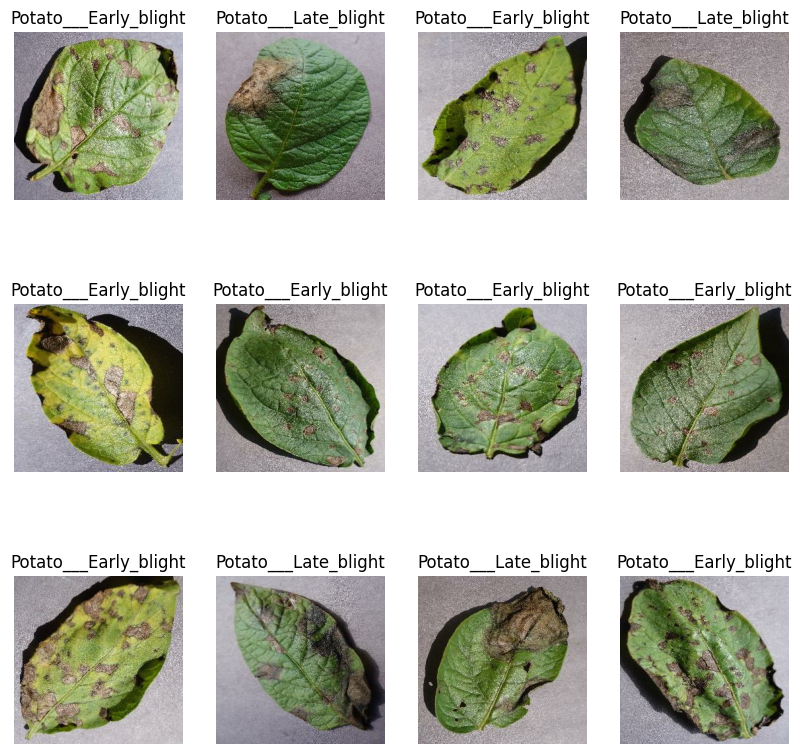

In [33]:
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

## Function to Split Dataset
  Dataset should be bifurcated into 3 subsets, namely:

1. Training: Dataset to be used while training
2. Validation: Dataset to be tested against while training
3. Test: Dataset to be tested against after we trained a model

In [35]:
len(dataset)

68

In [36]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

In [37]:
train_ds = dataset.take(54)
len(train_ds)

54

In [38]:
test_ds = dataset.skip(54)
len(test_ds)

14

In [39]:
val_size=0.1
len(dataset)*val_size

6.800000000000001

In [40]:
val_ds = test_ds.take(6)
len(val_ds)

6

In [41]:
test_ds = test_ds.skip(6)
len(test_ds)

8

In [42]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)

    return train_ds, val_ds, test_ds

In [43]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [44]:
len(train_ds)

54

In [45]:
len(val_ds)

6

In [46]:
len(test_ds)

8

## **Cache, Shuffle, and Prefetch the Dataset**

In [47]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

# **Building the Model**
## **Creating a Layer for Resizing and Normalization**
Before we feed our images to network, we should be resizing it to the desired size. Moreover, to improve model performance, we should normalize the image pixel value (keeping them in range 0 and 1 by dividing by 256). This should happen while training as well as inference. Hence we can add that as a layer in our Sequential Model.

You might be thinking why do we need to resize (256,256) image to again (256,256). You are right we don't need to but this will be useful when we are done with the training and start using the model for predictions. At that time somone can supply an image that is not (256,256) and this layer will resize it

In [48]:
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

## **Data Augmentation**
Data Augmentation is needed when we have less data, this boosts the accuracy of our model by augmenting the data.

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

## Applying Data Augmentation to Train Dataset

In [49]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

## **Model Architecture**

We use a CNN coupled with a Softmax activation in the output layer. We also add the initial layers for resizing, normalization and Data Augmentation.

We are going to use convolutional neural network (CNN) here. CNN is popular for image classification tasks. Watch below video to understand fundamentals of CNN

In [52]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [53]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (32, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (32, 60, 60, 64)         

## **Compiling the Model**
We use adam Optimizer, SparseCategoricalCrossentropy for losses, accuracy as a metric

In [54]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [55]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
54/54 [==============================] - 32s 346ms/step - loss: 0.8924 - accuracy: 0.5503 - val_loss: 0.7097 - val_accuracy: 0.7292
Epoch 2/50
54/54 [==============================] - 17s 313ms/step - loss: 0.6513 - accuracy: 0.7008 - val_loss: 0.5387 - val_accuracy: 0.8333
Epoch 3/50
54/54 [==============================] - 17s 311ms/step - loss: 0.4575 - accuracy: 0.8084 - val_loss: 0.5023 - val_accuracy: 0.7812
Epoch 4/50
54/54 [==============================] - 17s 314ms/step - loss: 0.3490 - accuracy: 0.8426 - val_loss: 0.4203 - val_accuracy: 0.8281
Epoch 5/50
54/54 [==============================] - 17s 309ms/step - loss: 0.2868 - accuracy: 0.8860 - val_loss: 0.1984 - val_accuracy: 0.9115
Epoch 6/50
54/54 [==============================] - 18s 325ms/step - loss: 0.1993 - accuracy: 0.9219 - val_loss: 0.4984 - val_accuracy: 0.8333
Epoch 7/50
54/54 [==============================] - 18s 337ms/step - loss: 0.1727 - accuracy: 0.9340 - val_loss: 0.4651 - val_accuracy: 0.8438

In [56]:
scores = model.evaluate(test_ds)

8/8 [==============================] - 2s 28ms/step - loss: 0.0268 - accuracy: 0.9922


**You can see above that we get  0.9922 accuracy for our test dataset. This is considered to be a pretty good accuracy**

In [57]:
scores

[0.02676541917026043, 0.9921875]

Scores is just a list containing loss and accuracy value

## **Plotting the Accuracy and Loss Curves**

In [58]:
history

In [59]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [60]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**loss, accuracy, val loss etc are a python list containing values of loss, accuracy etc at the end of each epoch**

In [61]:
type(history.history['loss'])

list

In [62]:

len(history.history['loss'])

50

In [63]:
history.history['loss'][:5] # show loss for first 5 epochs

[0.8924269080162048,
 0.6513209342956543,
 0.4575289487838745,
 0.34901559352874756,
 0.286823034286499]

In [64]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

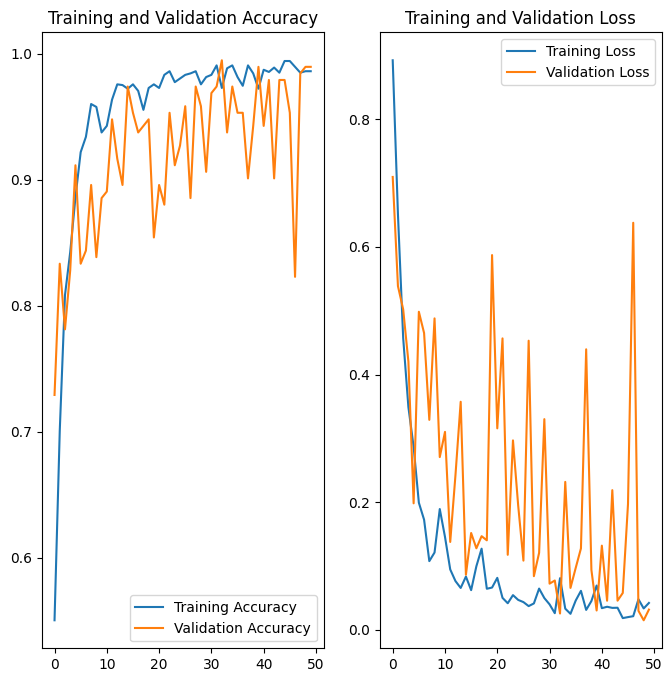

In [65]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## **Run prediction on a sample image**

first image to predict
actual label: Potato___healthy
1/1 [==============================] - 0s 132ms/step
predicted label: Potato___healthy


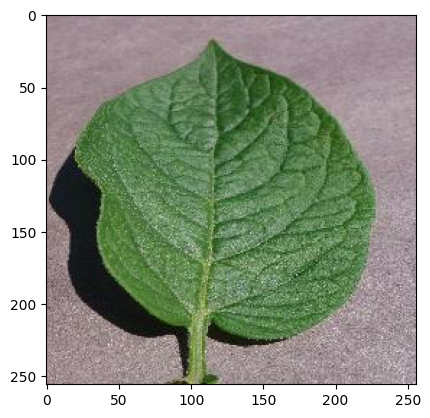

In [66]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()

    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])

## **Write a function for inference**

In [67]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

**Now run inference on few sample images**

1/1 [==============================] - 0s 20ms/step


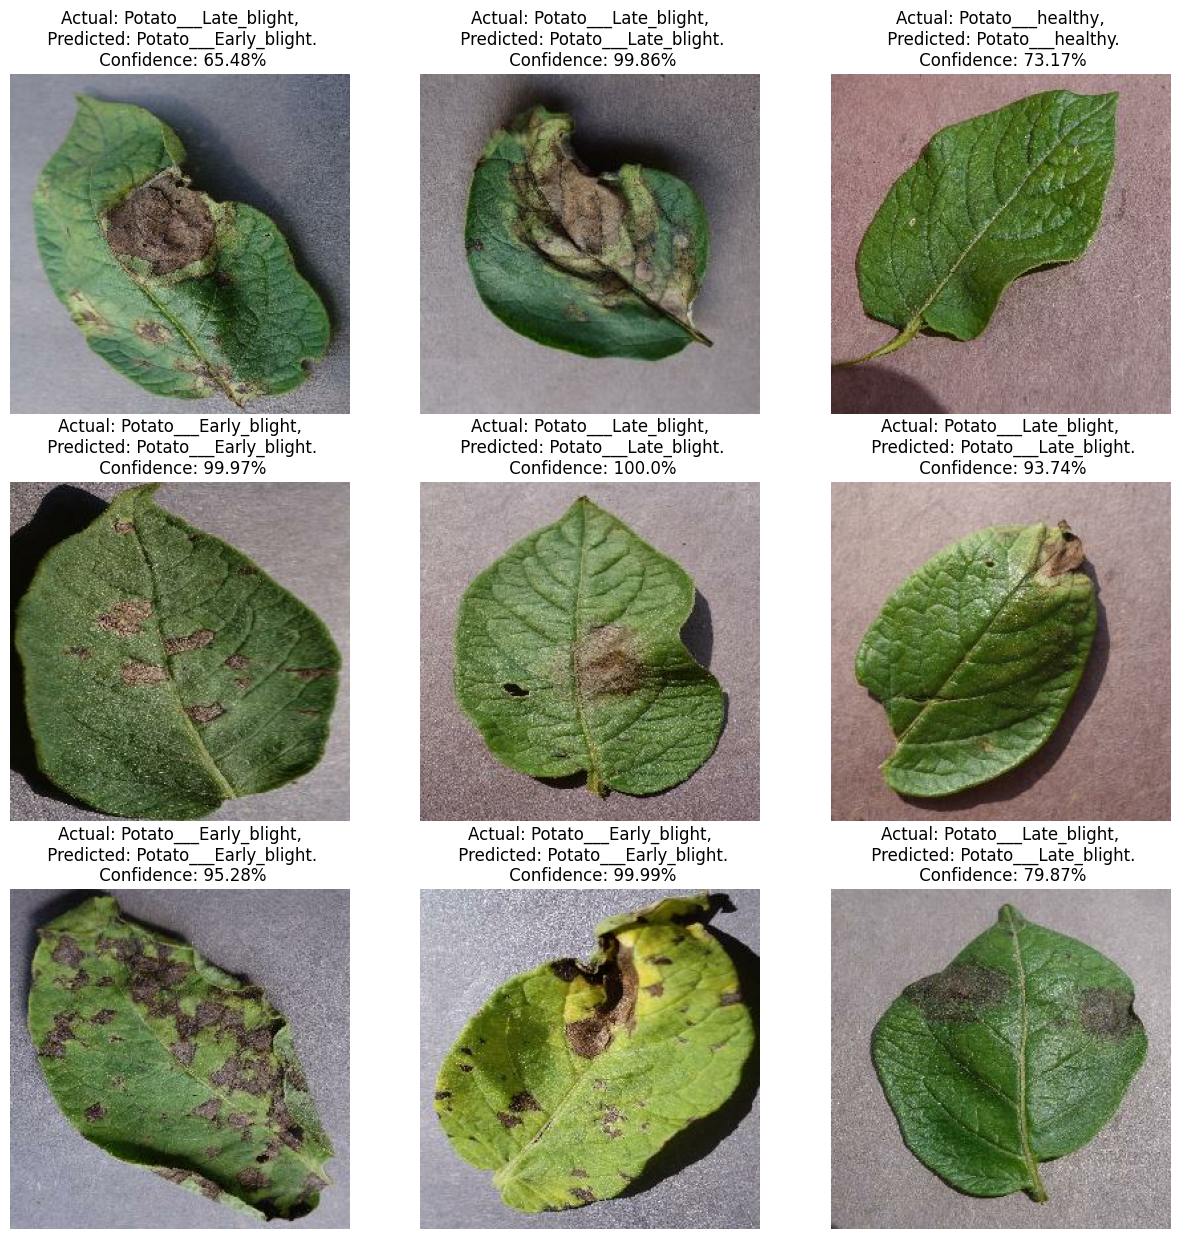

In [68]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")

        plt.axis("off")

## **Saving the Model**

We append the model to the list of models as a new version

In [ ]:
import os
model_version=max([int(i) for i in os.listdir("../models") + [0]])+1
model.save(f"../models/{model_version}")

In [ ]:
model.save("../potatoes.h5")